## Voy a hacer un analisis de la relacion entre que palabras contienen los tweets y su veracidad. Este analisis abarca, cantidad de palabras, cantidad de caracteres y palabras que aparecen.

#### Importo las bibliotecas necesarias

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

from bokeh.plotting import figure, output_file, show
from matplotlib.colors import ListedColormap
from PIL import Image
from wordcloud import WordCloud
from math import log, sqrt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re


Defino una paleta de colores

#### Creo el data frame en base al csv

In [2]:
tweets = pd.read_csv('csv/train.csv', encoding='latin-1')

In [3]:
cmap = cm.get_cmap('YlOrBr')

#### Analizo como esta formado mi data frame

In [4]:
tweets.sample(n=3)

,id,keyword,location,text,target
2901,4167,drown,NaN,when your moms being annoying so you turn your...,0
4851,6910,mass%20murderer,"California, USA",#TheaterShooting DEFENDANT/MASS MURDERER CHOSE...,1
3333,4774,evacuated,"Denver, Colorado",13000 evacuated as California firefighters fig...,1


#### Tanto la columna de location, keyword e id son irrelevantes para este analisis.

In [5]:
del(tweets['keyword'])
del(tweets['location'])
tweets.sample(n=3)

,id,text,target
4055,5760,Tales of the #trees #deep water loving #Lake T...,0
4435,6311,@EvaHanderek @MarleyKnysh great times until th...,1
598,866,[JAX Biz Journal] FedEx stops shipping potenti...,1


#### me guardo cuantos caracteres contiene cada tweet

In [6]:
tweets['nºcaracteres'] = tweets['text'].str.len()

In [7]:
tweets.sample(n=3)

,id,text,target,nºcaracteres
5714,8155,#RoddyPiperAutos Fears over missing migrants i...,1,137
1260,1816,1943: Poland - work party prisoners in the Naz...,1,136
6666,9554,If a nigga was a threat then that boy ah be th...,0,53


#### Ahora me interesa separar el texto en palabras.

In [8]:
tweets['palabras']=tweets['text'].str.split()

In [9]:
tweets.head()

,id,text,target,nºcaracteres,palabras
0,1,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,4,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask., Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #wildfires, evacuati..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #Al..."


#### Reordeno las columnas para mayor claridad.

In [10]:
tweets = tweets[['id','text','palabras','nºcaracteres','target']]

In [11]:
tweets.head()

,id,text,palabras,nºcaracteres,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,1


#### Me interesa saber cuantas palabras tiene que cada tweet.

In [12]:
type(tweets['palabras'])

pandas.core.series.Series

#### Guardo la cantidad de palabras en una nueva columna

In [13]:
lista_auxiliar = []
for i in tweets['palabras']:
    lista_auxiliar.append( len(i) )

In [14]:
tweets['nºpalabras'] = lista_auxiliar

In [15]:
tweets.head()

,id,text,palabras,nºcaracteres,target,nºpalabras
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,1,13
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,1,7
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,1,22
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,1,8
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,1,16


#### Guardo en cada tweet la cantidad de 

#### Reordeno

In [16]:
tweets = tweets[['id','text','palabras','nºcaracteres','nºpalabras','target']]

In [17]:
tweets.head()

,id,text,palabras,nºcaracteres,nºpalabras,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,13,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,7,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,22,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,8,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,16,1


#### Ya tengo bastante ordenado el data frame. Procedo a analizar.

#### Me interesa ver si hay una relacion entre el largo del tweet en palabra y el largo en caracteres. Hago spotter

In [18]:
tweets_largo = tweets.filter(items=['nºcaracteres', 'nºpalabras', 'target'])

In [19]:
tweets_largo.head()

,nºcaracteres,nºpalabras,target
0,69,13,1
1,38,7,1
2,133,22,1
3,65,8,1
4,88,16,1


#### Procedo a hacer un scatter entre ambos.

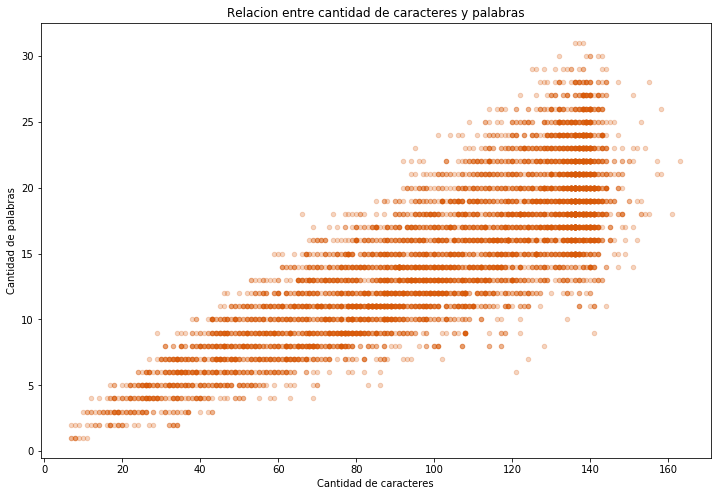

In [20]:
color = cmap(0.7)
tweets_largo.plot.scatter('nºcaracteres','nºpalabras', title='Relacion entre cantidad de caracteres y palabras',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca()
ax.set_xlabel('Cantidad de caracteres')
ax.set_ylabel('Cantidad de palabras');

#### se observa lo esperado

#### Relacion entre veracidad y largo en caracteres.

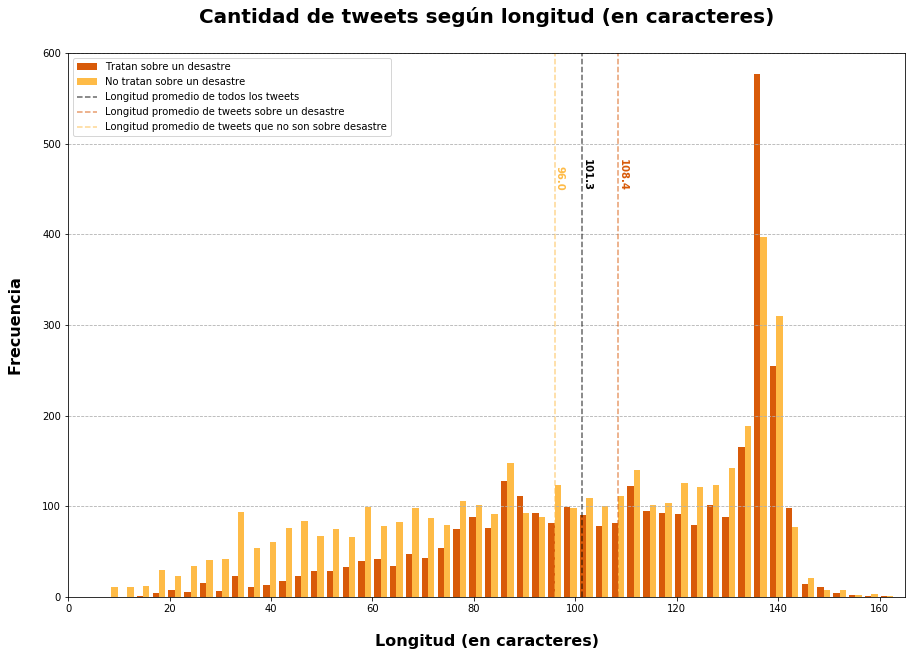

In [61]:
colores = cmap([0.7,0.4])
tweets_verd = tweets_largo[tweets_largo['target']==True]['nºcaracteres']
tweets_falsos = tweets_largo[tweets_largo['target']==False]['nºcaracteres']

promedio = tweets_largo['nºcaracteres'].mean()    
promedio_verd = tweets_largo[tweets_largo['target']==1]['nºcaracteres'].mean()
promedio_falsos = tweets_largo[tweets_largo['target']==0]['nºcaracteres'].mean()
plt.figure(figsize=(15,10))
# histogram
plt.hist([tweets_verd, tweets_falsos], bins=50, color=[colores[0], colores[1]], \
                label=['Tratan sobre un desastre', "No tratan sobre un desastre"])    
plt.vlines(x=promedio, ymin=0, ymax=600, color='black', \
                   alpha=0.6, linestyle = '--', label='Longitud promedio de todos los tweets')
plt.vlines(x=promedio_verd, ymin=0, ymax=600, color=colores[0], \
                   alpha=0.6, linestyle = '--', label='Longitud promedio de tweets sobre un desastre')
plt.vlines(x=promedio_falsos, ymin=0, ymax=600, color=colores[1], \
                   alpha=0.6, linestyle = '--', label='Longitud promedio de tweets que no son sobre desastre')
plt.xlim(0, 165)
plt.ylim(0, 600)
plt.text(promedio, 450, str(np.round(promedio, 1)), color='black', fontweight='bold', fontsize=10, rotation=270)
plt.text(promedio_verd, 450, str(np.round(promedio_verd, 1)), color=colores[0], fontweight='bold', fontsize=10, rotation=270)
plt.text(promedio_falsos, 450, str(np.round(promedio_falsos, 1)), color=colores[1], fontweight='bold', fontsize=10, rotation=270)
plt.title("Cantidad de tweets según longitud (en caracteres)", weight='bold', size=20, pad=30)
plt.ylabel("Frecuencia", labelpad=20, weight='bold', size=16)
plt.xlabel("Longitud (en caracteres)",labelpad=20, weight='bold', size=16)
plt.legend(prop={'size': 10})
plt.grid(b=True, axis='y', linestyle='--')

#### Hago lo mismo pero con palabras

In [ ]:
tweets_largo['intervalo de palabras']=pd.cut(tweets_largo['nºpalabras'], bins=[0,5,10,15,20,25,31], include_lowest=True)

tweets_largo

In [ ]:
tweets_largo = tweets_largo.groupby(['intervalo de palabras']).agg({'target':['mean','count','sum']})

In [ ]:
level0 = tweets_largo.columns.get_level_values(0)
level1 = tweets_largo.columns.get_level_values(1)
tweets_largo.columns = level0 + '_' + level1

In [ ]:
tweets_largo

In [ ]:
tweets_largo.rename({'target_mean': 'ratio_veraces', 'target_count': 'tweets totales','target_sum':'Tratan sobre un desastre'}, axis=1, inplace=True)

In [ ]:
tweets_largo['No tratan sobre un desastre'] = tweets_largo['tweets totales'] - tweets_largo['Tratan sobre un desastre']

In [ ]:
tweets_largo

In [ ]:
del tweets_largo['ratio_veraces']
del tweets_largo ['tweets totales']
tweets_largo

In [ ]:
colores = cmap([0.7,0.4])
barra_duo = tweets_largo.plot.bar(color=colores,figsize = (20,10))
barra_duo.set_title("Cantidad de tweets agrupados por el numero de palabras que contienen",fontsize = 22)
barra_duo.set_xlabel("Cantidad de palabras", fontsize = 18)
barra_duo.set_ylabel("Cantidad tweets", fontsize = 18)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
barra_duo.set_xticklabels( ["(0,5]","(5,10]","(10,15]","(15,20]","(20,25]","(25,31]"] );
barra_duo.legend(fontsize = 12)

## Palabras que tienen mas ocurrencias en tweets.

#### Procedo a crear un nuevo dataframe, donde levanto cada palabra junto con su target y id de tweet.

In [ ]:
palabras = tweets.explode('palabras')
del(palabras['text'])
del(palabras['nºcaracteres'])
del(palabras['nºpalabras'])
palabras.rename({'palabras': 'palabra', 'id': 'id_tweet','target': 'target_tweet' }, axis=1, inplace=True)
palabras.reset_index(inplace = True, drop = True)
palabras.head()

In [ ]:
palabras.info()

#### En el analisis no voy a discrimnar por mayusculas, paso todo a minuscula.

In [ ]:
palabras['palabra'] = palabras['palabra'].str.lower()
palabras.head()

#### Hay casos donde la palabra empieza con un caracter especial, ejemplo de #.

In [ ]:
palabras.iloc[7]

#### Yo quiero eliminar dichos caracteres, ya que en el caso que se encuentren ""#earthquake" y "earthquake" busco que cuenten como la misma palabra. 

In [ ]:
import re
palabras_limpias = []
for palabra in palabras['palabra']:
    palabra_limpia = re.sub('[^A-Za-z0-9]+','', palabra)
    palabras_limpias.append(palabra_limpia)

In [ ]:
palabras['palabra']=palabras_limpias

In [ ]:
palabras.iloc[7]

#### Ahora ya borramos los caracteres especiales, el siguiente paso es borrar las palabras que aparecen 2 veces en un tweet. Esto es para que las ocurrencias no cuenten doble.


In [ ]:
palabras.info()

In [ ]:
palabras.drop_duplicates(subset=['palabra','id_tweet'], keep="first", inplace = True)
palabras.reset_index(inplace = True, drop = True)

In [ ]:
palabras.info()

#### Ya fueron eliminadas las palabras repetidas de cada tweet, todo listo para el analisis

In [ ]:
agrupadas=palabras.groupby(['palabra']).agg({'target_tweet':['mean','count','sum']})
agrupadas.sample(3)

In [ ]:
agrupadas.info()

#### En este caso sum son las veces que la palabra aparece en tweets veridicos.(ya que el true esta representado con un uno)

#### Aplano el level de las columnas.

In [ ]:
level0 = agrupadas.columns.get_level_values(0)
level1 = agrupadas.columns.get_level_values(1)
agrupadas.columns = level0 + '_' + level1

In [ ]:
agrupadas.sample(3)

#### Renombro 

In [ ]:
agrupadas.rename({'target_tweet_mean': 'porcentaje_veraces', 'target_tweet_count': 'apariciones_totales','target_tweet_sum':'apariciones_veraces'}, axis=1, inplace=True)

In [ ]:
agrupadas.sample(3)

#### Transformo el ratio en porcentaje

In [ ]:
agrupadas['porcentaje_veraces'] = agrupadas['porcentaje_veraces']*100

In [ ]:
agrupadas.sample(3)

##### Agrego una columna de apariciones_falaces

In [ ]:
agrupadas['apariciones_falaces'] = (agrupadas['apariciones_totales'] - agrupadas['apariciones_veraces'])

In [ ]:
agrupadas.sample(3)

#### Considero que las palabras que aparecen menos del 0.2% de los tweets son irrelevantes para este analisis. Suelen ser 'one hit'

In [ ]:
agrupadas.info() #palabras previo a filtrar

In [ ]:
minimo_de_ocurrencias = (0.2/100)*len(tweets.index)
minimo_de_ocurrencias

In [ ]:
agrupadas = agrupadas.loc[agrupadas[('apariciones_totales')]>minimo_de_ocurrencias,:]

In [ ]:
agrupadas.info() #palabras despues de filtrar

In [ ]:
#### Cuales son las palabras que mas se repiten?

In [ ]:
agrupadas.sort_values(by=['apariciones_totales'], ascending=[False], inplace = True)

In [ ]:
agrupadas.head(7)

In [ ]:
####dropeo los espacio en blanco
agrupadas = agrupadas.drop('')
agrupadas.head(100)
len(agrupadas)

#### Grafico las 30 palabras mas repetidas

In [ ]:
agrupadas_mas_repetidas = agrupadas.head(30)

In [ ]:
saltos = np.linspace(0.3, 0.9, 30)
colores = cmap(saltos)

maximo = agrupadas_mas_repetidas['apariciones_totales'].max()

grafico = agrupadas_mas_repetidas.sort_values("apariciones_totales").plot(kind='barh', figsize=(14,12), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 100), rotation=35,fontsize=14,ha='right')
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("30 palabras mas repetidas", weight='bold', size=20, pad=15)
grafico.legend(fontsize = 15)

In [ ]:
agrupadas_sin_preposiciones = agrupadas.copy()

In [ ]:
agrupadas_sin_preposiciones.head()

In [ ]:
stopwords = list(STOPWORDS)
palabras = agrupadas_sin_preposiciones.index.tolist()

In [ ]:
es_stop = []
for palabra in palabras:
    es_stop.append( palabra not in stopwords )

agrupadas_sin_preposiciones = agrupadas_sin_preposiciones.iloc[es_stop]
agrupadas_sin_preposiciones.head()

In [ ]:
agrupadas_sin_preposiciones = agrupadas_sin_preposiciones.head(30) ### me quedo con las primeras 30
agrupadas_sin_preposiciones.head(2)

#### sin preposiciones mas repetidas

In [ ]:
saltos = np.linspace(0.3, 0.9, 30)
colores = cmap(saltos)

maximo = agrupadas_sin_preposiciones['apariciones_totales'].max()

grafico = agrupadas_sin_preposiciones.sort_values("apariciones_totales").plot(kind='barh', figsize=(14,12), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 10), rotation=35,fontsize=14,ha='right')
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("30 palabras mas repetidas (sin preposiciones)", weight='bold', size=20, pad=15)
grafico.legend(fontsize = 15)

##### veracidad de las palabras mas repetidas.

In [ ]:
saltos = np.linspace(0.4, 0.7, 30)
colores = cmap(saltos)

#maximo = agrupadas_mas_repetidas['apariciones_totales'].max()
maximo = 100

grafico = agrupadas_mas_repetidas.sort_values("porcentaje_veraces").plot(kind='barh', figsize=(14,12), y ='porcentaje_veraces', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 5), rotation=35,fontsize=14,ha='right')
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Veracidad de las 30 palabras mas repetidas", weight='bold', size=20, pad=15)
grafico.legend(fontsize = 15)

#### veracidad de mas repetidas sin preposiciones

In [ ]:
saltos = np.linspace(0.4, 0.7, 30)
colores = cmap(saltos)

#maximo = agrupadas_mas_repetidas['apariciones_totales'].max()
maximo = 100

grafico = agrupadas_sin_preposiciones.sort_values("porcentaje_veraces").plot(kind='barh', figsize=(14,12), y ='porcentaje_veraces', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 5), rotation=35,fontsize=14,ha='right')
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Veracidad de las 30 palabras mas repetidas (sin preposiciones)", weight='bold', size=20, pad=15)
grafico.legend(fontsize = 15)

#### Ordeno segun porcentaje de veracidad y apariciones totales.

In [ ]:
agrupadas.sort_values(by=['porcentaje_veraces', 'apariciones_totales'], ascending=[False, False], inplace = True)

In [ ]:
agrupadas.head()

#### Reordeno columnas

In [ ]:
agrupadas = agrupadas[['apariciones_veraces', 'apariciones_falaces', 'apariciones_totales', 'porcentaje_veraces']]
agrupadas.head()

### Me armo mi array de colores 

In [ ]:
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)


#### Como se distrubuyen las palabras a lo largo del porcentaje de veracidad? donde se concentran mas?

In [ ]:
plt.figure(figsize= (16,12) )
color = tuple( colores[19] )
fig=plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,100)
plt.title('Densidad de  palabras en funcion de % de veracidad ',fontsize=16,fontweight='bold')
ax.set_xlabel('% de veracidad')
agrupadas['porcentaje_veraces'].plot.kde(color = color , figsize=(10, 5));

In [ ]:
plt.figure(figsize=(10,10))    
n, bins, patches = plt.hist(agrupadas["porcentaje_veraces"], bins=10, color="c")
hist_porcentajes = plt.gca()

for i,p in enumerate(patches):
    plt.setp(p, "facecolor", colores[i+3])

plt.xticks(np.arange(0, 100+1, 10.0))
plt.yticks(np.arange(0, 210+1, 10.0))
plt.tick_params(axis='y', length=0)

hist_porcentajes.spines['right'].set_visible(False)
hist_porcentajes.spines['top'].set_visible(False)
hist_porcentajes.spines['left'].set_visible(False)

lineas = hist_porcentajes.get_yticks()
for i in lineas:
      hist_porcentajes.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
hist_porcentajes.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
hist_porcentajes.set_ylabel("Cantidad de Palabras", labelpad=20, weight='bold', size=16)

plt.title("Cantidad de palabras por porcentaje de veracidad", weight='bold', size=20, pad=30)

#### Con esto se puede observar que en aproximadamente entre el 20% 30% de la veracidad es donde se asocian mas palabras diferentes. Esto es debido a que suelen haber mas tweets verdaderos que falsos, por lo tanto es esperable que el pico este desviado hacia la izquierda del 50%.

#### Ahora veo como se distribuyen las palabras en funciona su % de veracidad y sus repeticiones.

In [ ]:
agrupadas.head(100)

#### Se puede observar que hay mucha palabras con el mas de 0.2 % de apariciones que tienen 100 de veracidad, observo como se relaciona la veracidad una palabra en relacion con la cantidad de repeticiones de la misma.

In [ ]:
agrupadas.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### Parece haber muy pocas palabras con mas de 500 apariciones, y como es obvio las que lo cumplen tienden a rondar el 50% de veracidad. Elimino estas al no tener relevancia en el analisis.


In [ ]:
agrupadas_short = agrupadas.loc[agrupadas[('apariciones_totales')]<500,:]

In [ ]:
agrupadas_short.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad (filtrando en 500)',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca();
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### Se sigue demostrando una gran acumulacion debajo de las 100 apariciones, vuelvo a filtrar.

In [ ]:
agrupadas_short = agrupadas.loc[agrupadas[('apariciones_totales')]<100,:]

In [ ]:
agrupadas_short.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad (filtrando en 100)',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### EXPLICAR PORQUE EL GRAFICO TIENE ESAS COSAS REDONDITAS.

#### Como es de esperarse vemos una agrupacion de muchas palabras en 100% de veracidad, esto se debe a que la muestra no es suficientemente grande. 

#### Luego se puede observar que al buscar palabras con mayo numero de apariciones, el procentaje de veracidad se encuentra alrededor del 50%.

#### Cantidad de apariciones con 100% de veracidad

In [ ]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]==100,:]

In [ ]:
saltos = np.linspace(0.2, 0.9, 50)
colores = cmap(saltos)

maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(14,12), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 5))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras con 100% de veracidad", weight='bold', size=20, pad=15)
grafico.legend(fontsize = 15)

#### Quiero graficar todas las palabras que tienen por lo menos un 90% de veracidad, me parece algo interesante.

In [ ]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]>=90,:]
agrupadas_short.head()

In [ ]:
agrupadas_short.info()


#### Tengo 100 items, un wordcloud es una buena idea. El tamaño va asociado a la cantidad de repeticiones, el color a el % de veracidad.

In [ ]:
color_wordcloud = cmap(np.linspace(0.4, .9,101))
colores_rgb = ()
for i in color_wordcloud:
    #convierto rgba en rgb
    aux = list(i)
    del aux[3]
    aux = (int(x * 255) for x in aux)
    aux =tuple(aux)
    colores_rgb = colores_rgb + (aux,)
    


In [ ]:
#cosa de mandinga, no tocar    
def my_tf_color_func_mayor_veracidad(dictionary):
  def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
    return colores_rgb[int ( (dictionary[word]-90)*10) ]
  return my_tf_color_func_inner   

In [ ]:
indices = list(agrupadas_short.index)
valores = list(agrupadas_short['apariciones_totales'])
todas_las_palabras = list()

In [ ]:
for i in range( len(indices) ):
    for j in range ( valores[i] ):
        todas_las_palabras.append(indices[i])

In [ ]:
todas_las_palabras = pd.Series(todas_las_palabras).to_string()

In [ ]:
mask = np.array(Image.open("../TP1-Organizacion-de-Datos/imagenes/ovalo.png"))

In [ ]:
keys = {}
veracidades = agrupadas_short['porcentaje_veraces'].tolist()

for i in range(len(indices)):
    keys[indices[i]] = veracidades[i]


In [ ]:
plt.figure(figsize= (16,12) )
wordcloud = WordCloud(font_path='../fonts/truetype/ubuntu/Ubuntu-M.ttf',collocations=False, colormap=cmap, \
                      relative_scaling=0.5, background_color='white', width=800, height=200, \
                      color_func=my_tf_color_func_mayor_veracidad(keys), normalize_plurals=False, mask=mask, prefer_horizontal=0.5).generate(todas_las_palabras)

topes = mpl.colors.Normalize(vmin=90, vmax=100)
cmap_wordcloud = ListedColormap(cmap(np.linspace(0.4, 0.9, 256)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.colorbar(cm.ScalarMappable(norm=topes, cmap=cmap_wordcloud), label='Veracidad (%)', \
             orientation='horizontal', shrink=0.75, pad=0.05)
plt.axis("off")
plt.title("Palabras con mas de 90% de veracidad ", weight='bold', size=20, pad=30)
plt.show()

#### Ahora voy a analisar, las palabras que tienden a ser menos veraces.

In [ ]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]==0,:]
agrupadas_short.info()

In [ ]:
saltos = np.linspace(0.3, 0.5, 2)
colores = cmap(saltos)

maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(10,7), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 2))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras con 0% de veracidad", weight='bold', size=20, pad=15)

In [ ]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]<=5,:]
agrupadas_short.info()

In [ ]:
saltos = np.linspace(0.3, 0.8, 13)
colores = cmap(saltos)

maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(20,14), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 2))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras por debajo del 5% de veracidad", weight='bold', size=20, pad=15)

#### Estudiemos el 10%, buscando mas palabras

In [ ]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]<=10,:]
agrupadas_short.info()

#### Tengo 37 elementos por debajo del 10%, hago un bar plot.

In [ ]:
saltos = np.linspace(0.3, 0.88, 41)
colores = cmap(saltos)

def my_tf_color_func_mayor_veracidad(dictionary):
  def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
    return colores_rgb[int ( dictionary[word]*4) ]
  return my_tf_color_func_inner


maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(14,15), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 5),rotation=35,fontsize=16,ha='right')
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras por debajo del 10% de veracidad", weight='bold', size=20, pad=15)

#### Palabras con 10% de apariciones

In [ ]:
indices = list(agrupadas_short.index)
valores = list(agrupadas_short['apariciones_totales'])
todas_las_palabras = list()

for i in range( len(indices) ):
    for j in range ( valores[i] ):
        todas_las_palabras.append(indices[i])
        
todas_las_palabras = pd.Series(todas_las_palabras).to_string()

keys = {}
veracidades = agrupadas_short['porcentaje_veraces'].tolist()

for i in range(len(indices)):
    keys[indices[i]] = veracidades[i]


In [ ]:
color_wordcloud = cmap(np.linspace(0.4, .9, 39))


plt.figure(figsize= (16,12) )
wordcloud = WordCloud(font_path='../fonts/truetype/ubuntu/Ubuntu-M.ttf',collocations=False, colormap=cmap, \
                      relative_scaling=0.5, background_color='white', width=800, height=200, \
                      color_func=my_tf_color_func_mayor_veracidad(keys), normalize_plurals=False, mask=mask, prefer_horizontal=0.5).generate(todas_las_palabras)

topes = mpl.colors.Normalize(vmin=0, vmax=10)
cmap_wordcloud = ListedColormap(cmap(np.linspace(0.4, 0.9, 256)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.colorbar(cm.ScalarMappable(norm=topes, cmap=cmap_wordcloud), label='Veracidad (%)', \
             orientation='horizontal', shrink=0.75, pad=0.05)
plt.axis("off")
plt.title("Palabras con menos de 10% de veracidad", weight='bold', size=20, pad=30)
plt.show()

### extra -> wordcloud de las palabras que mas se repiten

In [ ]:
agrupadas.info()

In [ ]:
indices = list(agrupadas.index)
valores = list(agrupadas['apariciones_totales'])
todas_las_palabras = list()

for i in range( len(indices) ):
    for j in range ( valores[i] ):
        todas_las_palabras.append(indices[i])
        
todas_las_palabras = pd.Series(todas_las_palabras).to_string()


In [ ]:
len(todas_las_palabras)

In [ ]:
type(STOPWORDS)

In [ ]:
mask = np.array(Image.open("imagenes/twitter.jpg"))
wordcloud_bandera = WordCloud(stopwords=[""], collocations=False,background_color="white", mode="RGBA", max_words=1000, mask=mask, normalize_plurals=False).generate(todas_las_palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/palabras_con_wordstops.png", format="png")

plt.show()

#### filtrando por stopword (prepositions)

In [ ]:
mask = np.array(Image.open("imagenes/twitter.jpg"))
wordcloud_bandera = WordCloud(stopwords=STOPWORDS, collocations=False,background_color="white", mode="RGBA", max_words=1000, mask=mask, normalize_plurals=False).generate(todas_las_palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/palabras_sin_wordstops.png", format="png")

plt.show()

### longitud palabra promedio

In [ ]:
agrupadas.head()

In [ ]:
type(agrupadas.index[1])

In [ ]:
agrupadas['largo'] = agrupadas.index.str.len()

In [ ]:
agrupadas.head()

In [ ]:
color = cmap(0.7)
agrupadas.plot.scatter('largo','porcentaje_veraces', title='Relacion entre el largo de una palabra y su veracidad',alpha=0.25,figsize=(16,10), color = color);
ax=plt.gca()
ax.set_xlabel('Cantidad de caracteres')
ax.set_ylabel('Porcentaje de veracidad');

#### Ver la longitud promedio de las palabras

In [ ]:
tweets.info()

In [ ]:
tweets.head()

In [ ]:
tweets['long_promedio_palabra'] = (tweets['nºcaracteres']/tweets['nºpalabras'])

In [ ]:
tweets.sample(3)

In [ ]:
long_promedio = tweets['long_promedio_palabra'].mean()
long_promedioV = (tweets.loc[tweets['target'] == 1])['long_promedio_palabra'].mean()
long_promedioF = (tweets.loc[tweets['target'] == 0])['long_promedio_palabra'].mean()

In [ ]:
print([long_promedio, long_promedioV, long_promedioF])

In [ ]:
plt.figure(figsize= (12,6))

ax = plt.subplot()

# Example data
labels = ('Todos los tweets', 'Tweets verdaderos', 'Tweets falsos',)
y_pos = np.arange(len(labels))
promedio = [long_promedio, long_promedioV, long_promedioF]

ax.barh(y_pos, promedio, align='center', color = cmap([0.6,0.75,0.45]))
ax.set_yticks(y_pos)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)

plt.xticks(np.arange(0, 7.5, step=0.2), rotation=35,fontsize=10,ha='right')

lineas = ax.get_xticks()
for i in lineas:
    
      ax.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')

ax.invert_yaxis()  
ax.set_xlabel('Largo promedio de palabra ( en caracteres)')
ax.set_title('Relacion entre largo de las palabras y veracidad del tweets')
